# The Lorenz Attractor

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from celluloid import Camera
import IPython.display as IPdisplay
from PIL import Image


## The Lorenz Attractor can be defined by the following set of Differential Equations : 

### $$ \frac{dx}{dt} = \sigma(y-x) $$ <br> $$ \frac{dy}{dt} = rx-y-xz $$ <br> $$ \frac{dz}{dt} = xy-bz $$ <br> The solutions of these equations lead to what is called as the Lorenz attractor

### Define the Initial Conditions, parameters and the time span : 

In [2]:
in_cond = [0.1 , 0 , 0] # Initial condition of our state

# Paremeters are sigma, r and b
sigma = 10      # Prandtl Number
r = 28          # Rayleigh Number
b = 8/3         # Aspect ratio 

# define the time span over which we wish to integrate the differential equations
ti = 0
tf = 50
steps = 10
tspan = np.linspace(ti, tf, tf*steps)


### Define a function that returns an array of the Differential Equations : 

In [3]:
def lorenz_system_de(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (r - z) - y
    dz_dt = x * y - b * z
    return [dx_dt, dy_dt, dz_dt]

### Solve the system of equations and obtain the numerically integrated points

In [4]:
sol = odeint(lorenz_system_de, in_cond, tspan)


### Defining a function to plot the solutions and take a snap using Camera 

In [5]:
def plot_lorenz(sol,fig):
    
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = sol[:, 0]
    y = sol[:, 1]
    z = sol[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_title('Lorenz system attractor')
    ax.set_xlabel('Rate of Convection')
    ax.set_ylabel('Horizontal Temperature Variation')
    ax.set_zlabel('Verical Temperature Variation')
    
    

### Plotting the solutions at each time step and creating an animation :

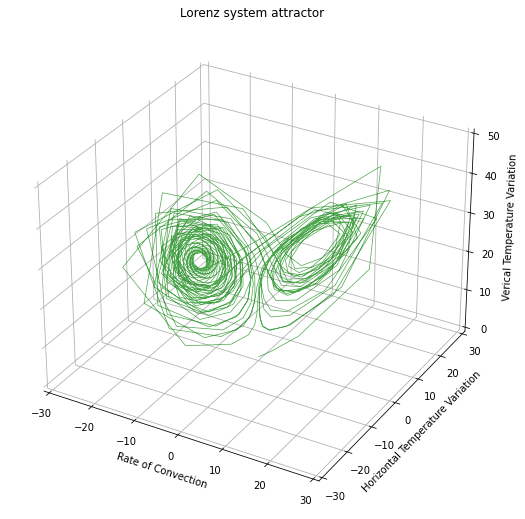

In [6]:
fig = plt.figure(figsize=(12, 9))
camera = Camera(fig)
for i in range(len(tspan)+1): 
    sol_plot = sol[0:i+1,:]
    plot_lorenz(sol_plot,fig)
    camera.snap()
    
animation = camera.animate()
animation.save('lorenz_system.gif', writer = 'pillow', fps = 50) 
Image.open('lorenz_system.gif')
IPdisplay.Image(url='lorenz_system.gif')

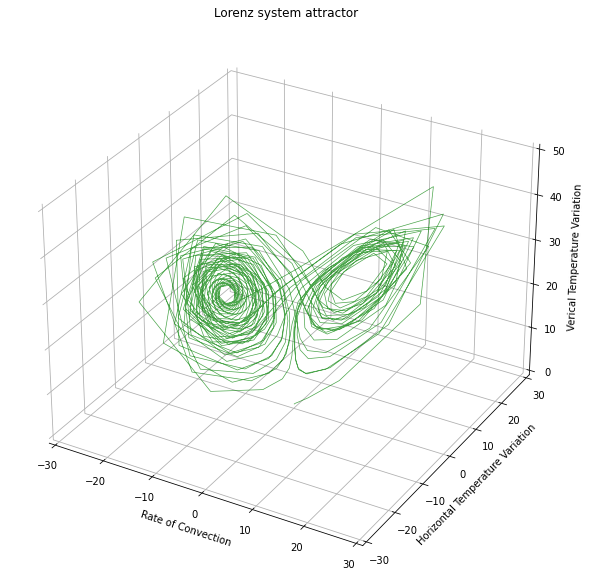

In [7]:
fig1 = plt.figure(figsize = (10,15))
plot_lorenz(sol,fig1)
plt.savefig('lorenz_attracto.png')

# Comparison of different Initial Conditions : 


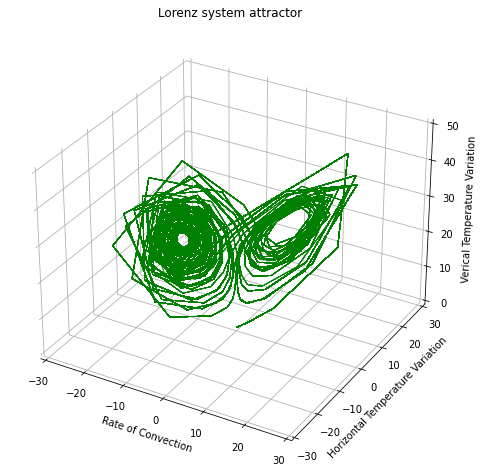

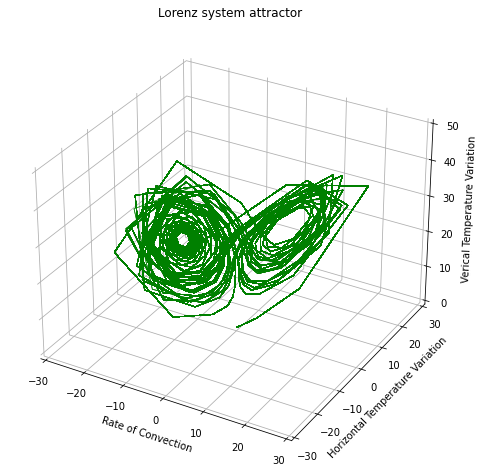

In [8]:
# Will run the above code for different functions and see how we obtain chaotic behavior
in1 =  [0.1 , 0 , 0]   # First Initial Condition 
in2 = [0.1002 , 0.103 , 0.02 ]   # Second Initial Condition
# Solving for each initial conditions : 
sol1 = odeint(lorenz_system_de, in1, tspan)
sol2 = odeint(lorenz_system_de, in2, tspan)
fig_in1 = plt.figure(figsize = (8,10))
fig_in2 = plt.figure(figsize = (8,10))
camera_in1 = Camera(fig_in1)
camera_in2 = Camera(fig_in2)
for i in range(len(tspan)+1): 
    sol_plot1 = sol1[0:i+1,:]
    sol_plot2 = sol2[0:i+1,:]
    plot_lorenz(sol_plot1,fig_in1)
    camera_in1.snap()
    plot_lorenz(sol_plot2,fig_in2)
    camera_in2.snap()
  


In [9]:
animation_in1 = camera_in1.animate()
animation.save('lorenz_in1.gif', writer = 'pillow', fps = 50) 
Image.open('lorenz_in1.gif')
IPdisplay.Image(url='lorenz_in1.gif')

In [10]:
animation_in1 = camera_in2.animate()
animation.save('lorenz_in2.gif', writer = 'pillow', fps = 50)
Image.open('lorenz_in2.gif')
IPdisplay.Image(url='lorenz_in2.gif')